# Loading Models and Defining Paths and Variables

In [13]:
import csv

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

random_seed = 42

Paths in the project

In [14]:
dataset = "C:\\Users\\anubh\Desktop\Hand gesture recognition\hand gesture recognition with mediapipe\datasets\keypoint.csv"
model_save_path = "C:\\Users\\anubh\Desktop\Hand gesture recognition\hand gesture recognition with mediapipe\models\keypoint_classifier.keras"
tflite_save_path = "C:\\Users\\anubh\Desktop\Hand gesture recognition\hand gesture recognition with mediapipe\models\keypoint_classifier_tf.tflite"


In [15]:
num_classes = 5

Dataset Reading

In [16]:
x_dataset = np.loadtxt(dataset, delimiter = ',', dtype = 'float32', usecols = list(range(1, (21*2) + 1)))

In [17]:
y_dataset = np.loadtxt(dataset, delimiter = ',', dtype = 'int32', usecols=(0))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size = 0.75, random_state = random_seed)

# Model building

In [19]:
#usual model
model = tf.keras.Sequential([
    layers.Input((21*2)),
    layers.Dropout(0.2),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.4),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
])
#smaller model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])
#cnn


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 32)                1376      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
Total params: 1989 (7.77 KB)
Trainable params: 1989 (7.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
cp_callback = keras.callbacks.ModelCheckpoint(
    model_save_path, verbose = 1, save_weights_only = False)
es_callback = keras.callbacks.EarlyStopping(patience = 30, verbose = 1)
Callbacks = [cp_callback, es_callback]

In [21]:
model.compile(
    optimizer = "rmsprop",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy'],
)

# Fitting the model

In [22]:
model.fit(x_train,
          y_train,
          epochs = 1000,
          batch_size = 64,
          validation_data = (x_test, y_test),
          callbacks = Callbacks,
         )          

Epoch 1/1000
60/72 [========================>.....] - ETA: 0s - loss: 1.5010 - accuracy: 0.3143
Epoch 1: saving model to C:\Users\anubh\Desktop\Hand gesture recognition\hand gesture recognition with mediapipe\models\keypoint_classifier.keras
72/72 [==============================] - 1s 8ms/step - loss: 1.4865 - accuracy: 0.3272 - val_loss: 1.3001 - val_accuracy: 0.5558
Epoch 2/1000
66/72 [==========================>...] - ETA: 0s - loss: 1.3095 - accuracy: 0.4429
Epoch 2: saving model to C:\Users\anubh\Desktop\Hand gesture recognition\hand gesture recognition with mediapipe\models\keypoint_classifier.keras
72/72 [==============================] - 0s 3ms/step - loss: 1.3050 - accuracy: 0.4433 - val_loss: 1.1051 - val_accuracy: 0.6937
Epoch 3/1000
50/72 [===================>..........] - ETA: 0s - loss: 1.1822 - accuracy: 0.5109
Epoch 3: saving model to C:\Users\anubh\Desktop\Hand gesture recognition\hand gesture recognition with mediapipe\models\keypoint_classifier.keras
72/72 [=========

# Evaluating the model

In [23]:
val_loss ,val_acc  = model.evaluate(x_test, y_test, batch_size = 64)

24/24 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9558


Day 1: We get an accuracy of 98.41% on the test data which is kinda good so like get

Day 2: We get 98.58% but at 185 epochs compared to 127 at day 127 epochs with the same model

Day 2.1: We get 96.49% at 204 epochs. AI is taking over.

Day 3: We get 97.66% at 214 epochs. Data leakage is real. Altho very sad that the max accuracy died down.

Day 4: 96.83% with a model of 60-70% the parameters.

Day 5: Accuracy 95.58% for 143 epochs.

In [24]:
model = keras.models.load_model(model_save_path)

Inference Test

In [25]:
predict_result = model.predict(np.array([x_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 85ms/step
[4.9251937e-03 2.5286367e-02 9.6941662e-01 6.4205874e-06 3.6543031e-04]
2


# Confusion Matrix

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


48/48 [==============================] - 0s 985us/step


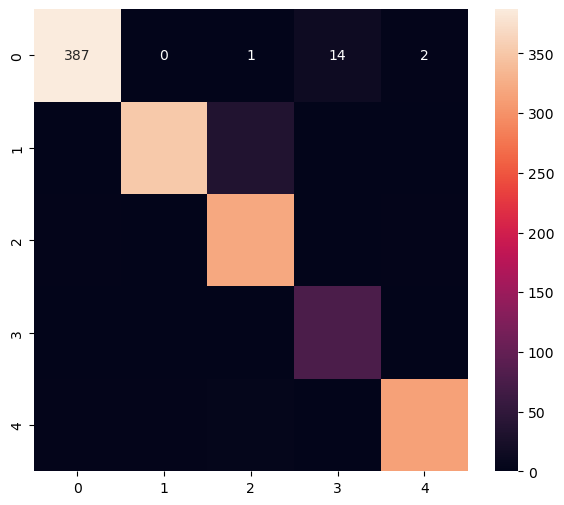

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       404
           1       0.99      0.91      0.95       387
           2       0.89      0.98      0.93       325
           3       0.85      1.00      0.92        77
           4       0.98      0.97      0.98       322

    accuracy                           0.96      1515
   macro avg       0.94      0.96      0.95      1515
weighted avg       0.96      0.96      0.96      1515



In [27]:
def print_confusion_matrix(y_true, y_pred, report = True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred,labels = labels)

    df_cmx = pd.DataFrame(cmx_data, index = labels, columns = labels)
    fig, ax = plt.subplots(figsize =(7,6))
    sns.heatmap(df_cmx, annot= True, fmt= 'g', square = False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis = 1)

print_confusion_matrix(y_test, y_pred)

# Converting model to TFlite

In [28]:
model.save(model_save_path)

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\anubh\AppData\Local\Temp\tmpm0x2de_m\assets


INFO:tensorflow:Assets written to: C:\Users\anubh\AppData\Local\Temp\tmpm0x2de_m\assets


In [32]:
open(tflite_save_path, 'wb').write(tflite_quantized_model)

6144

# Inference Test

In [33]:
interpreter = tf.lite.Interpreter(model_path = tflite_save_path)
interpreter.allocate_tensors()

In [34]:
# get I/O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [35]:
interpreter.set_tensor(input_details[0]['index'], np.array([x_test[0]]))

In [36]:
%%time
# inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.99 ms


In [37]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.0335680e-03 2.5201643e-02 9.6938872e-01 6.0693078e-06 3.7006958e-04]
2
